In [2]:
import pandas as pd
import plotly.express as ex
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [10]:
data = pd.read_csv("./data.csv")

In [11]:
data

,problem,num_obj,iteration,num_gens,RVEA_median_asf,NSGAIII_median_asf,iRVEA_median_asf,iNSGAIII_median_asf,NIMBUS-RVEA_median_asf,NIMBUS-NSGAIII_median_asf,...,iRVEA_num_solns,iNSGAIII_num_solns,NIMBUS-RVEA_num_solns,NIMBUS-NSGAIII_num_solns,RVEA_num_func_eval,NSGAIII_num_func_eval,iRVEA_num_func_eval,iNSGAIII_num_func_eval,NIMBUS-RVEA_num_func_eval,NIMBUS-NSGAIII_num_func_eval
0,DTLZ2,3,1,100,0.540486,0.560730,0.306339,0.289754,0.257917,0.251839,...,108,105,49,50,10589,10705,10381,10705,4754,5050
1,DTLZ2,3,2,100,0.674968,0.674564,0.164450,0.110723,0.195627,0.031223,...,108,105,14,50,21189,21305,19135,21305,6802,10050
2,DTLZ2,3,3,100,0.365734,0.365383,0.082181,0.053923,-0.036200,-0.043992,...,108,105,21,50,31789,31905,27055,31905,7896,15050
3,DTLZ2,3,4,100,0.562853,0.562167,0.251087,0.238713,0.226275,0.227634,...,108,105,50,50,42389,42505,36125,42505,11206,20050
4,DTLZ3,3,1,100,15.281198,14.610579,17.425457,16.782160,21.036172,5.363306,...,108,105,34,50,10611,10705,10411,10705,2176,5050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,DTLZ3,9,4,250,0.454153,0.512750,0.092388,11.195913,0.055609,0.083394,...,174,165,43,50,165143,166165,165485,166165,40556,50050
332,DTLZ4,9,1,250,0.370972,0.516930,0.047381,-0.001492,-0.028209,-0.140923,...,174,165,50,50,39747,41665,38083,41665,10428,12550
333,DTLZ4,9,2,250,0.531984,0.608128,0.104045,0.050674,0.002772,-0.039756,...,174,165,8,50,81247,83165,80351,83165,20060,25050
334,DTLZ4,9,3,250,0.380722,0.461365,0.039389,-0.007476,0.028525,-0.050808,...,174,165,14,50,122747,124665,122829,124665,30486,37550


In [12]:
all_cols = list(data.columns)
categories = ["asf", "norm"]
iterations = [1,2,3,4]
ranks = [1,2,3,4,5,6]

for cat in categories:
    cols = [name for name in all_cols if "median" in name and cat in name]
    for it in iterations:
        vals = data[data["iteration"]==it][cols]
        order = np.argsort(vals.values, axis=1)
        ranked = np.empty_like(order)
        for row, row_order in enumerate(order):
            ranked[row, row_order] = ranks
        data.loc[vals.index, cols] = ranked

<IPython.core.display.Javascript object>


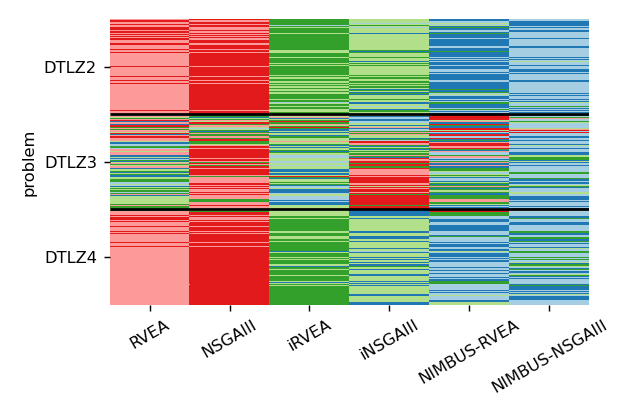

In [13]:
heatdata_cols = [name for name in all_cols if "median" in name and "asf" in name]
renamed_cols = {a: a.split('_')[0] for a in heatdata_cols}
heatmap_data_all = data.rename(columns=renamed_cols)
heatmap_data_all = heatmap_data_all.sort_values(by=["problem", "num_obj"]).set_index(["problem"])
#list(renamed_cols.values())[::-1]
#["problem", "num_obj", "num_gens"])

font_size=9

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)

width = 2.4 *2
height = width /1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
fig.set_size_inches(width, height)
cmap = sns.color_palette("Paired", 6)
sns.heatmap(
        heatmap_data_all[renamed_cols.values()],
        cmap=cmap,
        cbar=False,
        cbar_kws={'label': 'Ranks'},
        axes=ax, yticklabels=["DTLZ2", "DTLZ3", "DTLZ4"])

sep_line_1_pos = len(heatmap_data_all[heatmap_data_all.index=="DTLZ2"])
sep_line_2_pos = sep_line_1_pos + len(heatmap_data_all[heatmap_data_all.index=="DTLZ3"])
end = len(heatmap_data_all)

ax.hlines([sep_line_1_pos, sep_line_2_pos], *ax.get_xlim())
ax.set_yticks([sep_line_1_pos/2, (sep_line_1_pos+sep_line_2_pos)/2, (sep_line_2_pos+end)/2])
#ax.set(xlabel='Algorithm', ylabel='[Problem]-[Number of objectives]')
plt.xticks(rotation=30)
#plt.title("Algorithms ranked according to median\nASF values of the returned solutions")
plt.tight_layout()
plt.show()

#fig.savefig('DTLZ_asf_heatmap_no_legend.pdf')

<IPython.core.display.Javascript object>


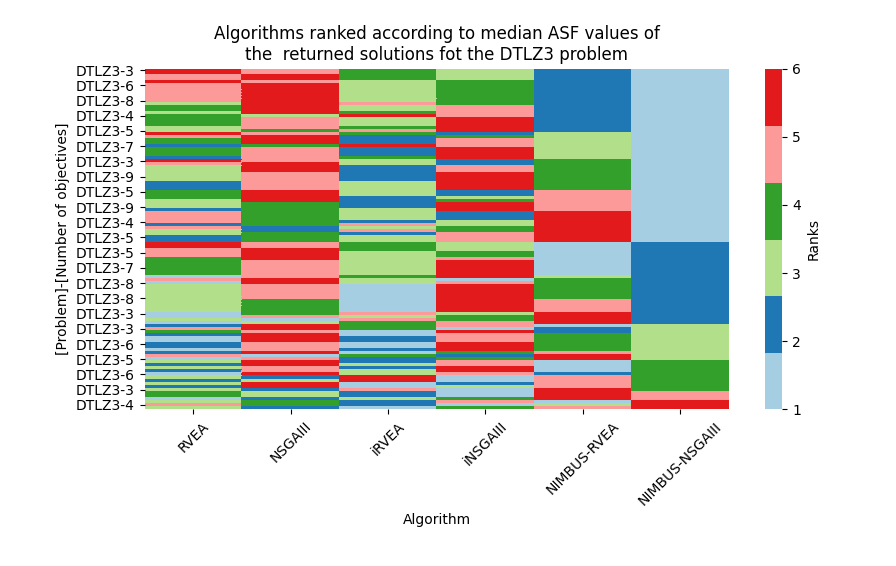

In [6]:
heatdata_cols = [name for name in all_cols if "median" in name and "asf" in name]
renamed_cols = {a: a.split('_')[0] for a in heatdata_cols}
heatmap_data_3 = data.rename(columns=renamed_cols)[data["problem"]=="DTLZ3"]
heatmap_data_3 = heatmap_data_3.sort_values(by=list(renamed_cols.values())[::-1]).set_index(["problem", "num_obj"])

#list(renamed_cols.values())[::-1]
cmap = sns.color_palette("Paired", 6)
ax = sns.heatmap(
        heatmap_data_3[renamed_cols.values()],
        cmap=cmap,
        cbar_kws={'label': 'Ranks'})
ax.set(xlabel='Algorithm', ylabel='[Problem]-[Number of objectives]')
plt.xticks(rotation=45)
plt.title("Algorithms ranked according to median ASF values of\nthe  returned solutions fot the DTLZ3 problem")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


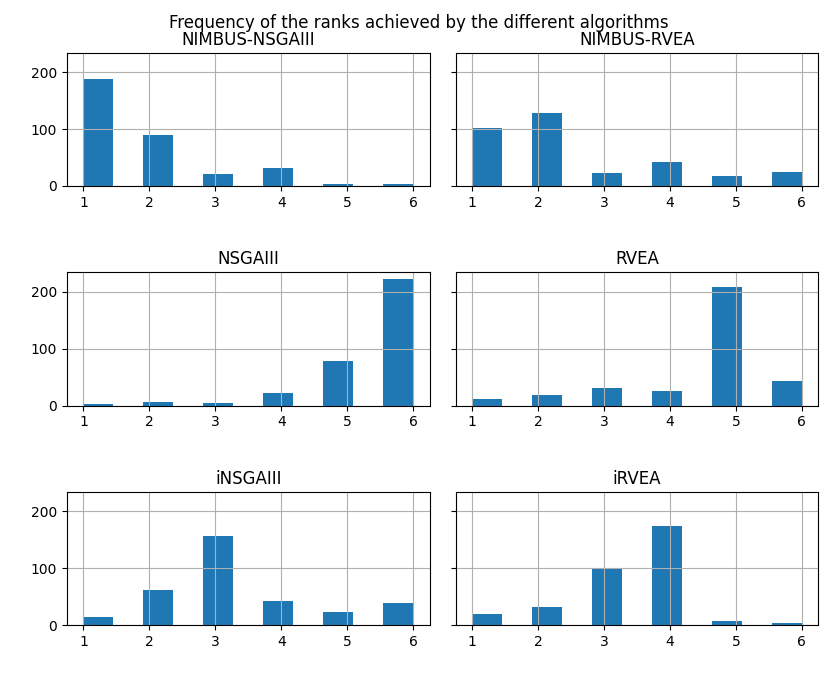

/home/rishi/.virtualenvs/desdeo-emo/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/home/rishi/.virtualenvs/desdeo-emo/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/home/rishi/.virtualenvs/desdeo-emo/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/home/rishi/.virtualenvs/desdeo-emo/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


T

In [7]:
heatmap_data_all[renamed_cols.values()].hist(bins=11, sharey=True)
plt.suptitle("Frequency of the ranks achieved by the different algorithms")
plt.tight_layout()

<IPython.core.display.Javascript object>


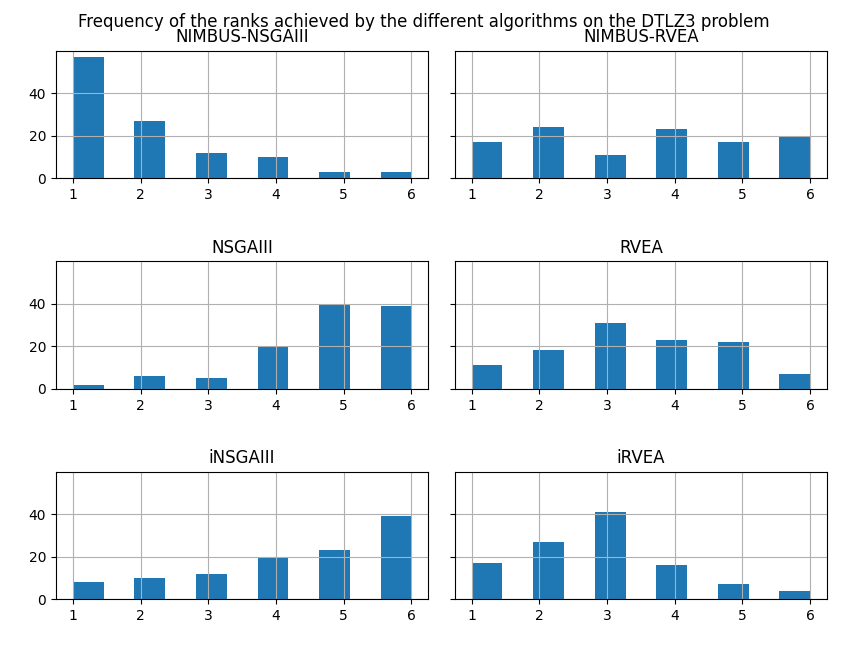

In [8]:
heatmap_data_3[renamed_cols.values()].hist(bins=11, sharey=True)
plt.suptitle("Frequency of the ranks achieved by the different algorithms on the DTLZ3 problem")
plt.tight_layout()

<IPython.core.display.Javascript object>


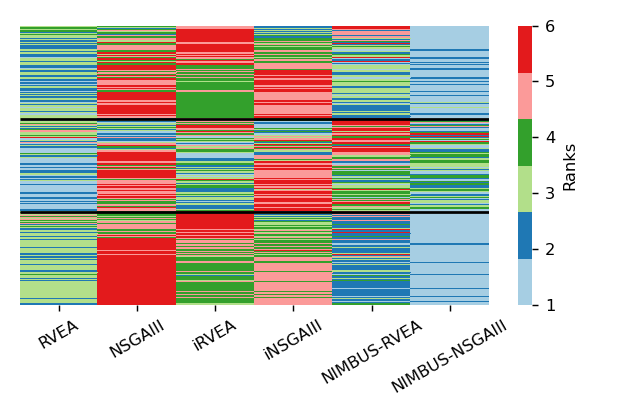

In [61]:
heatdata_cols = [name for name in all_cols if "median" in name and "norm" in name]
renamed_cols = {a: a.split('_')[0] for a in heatdata_cols}
heatmap_data_all = data.rename(columns=renamed_cols)
heatmap_data_all = heatmap_data_all.sort_values(by=["problem", "num_obj"]).set_index(["problem"])
#list(renamed_cols.values())[::-1]
#["problem", "num_obj", "num_gens"])
font_size=9

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)

width = 2.4 *2
height = width /1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
fig.set_size_inches(width, height)
cmap = sns.color_palette("Paired", 6)
sns.heatmap(
        heatmap_data_all[renamed_cols.values()],
        cmap=cmap,
        cbar_kws={'label': 'Ranks'},
        axes=ax, yticklabels=["DTLZ2", "DTLZ3", "DTLZ4"])

sep_line_1_pos = len(heatmap_data_all[heatmap_data_all.index=="DTLZ2"])
sep_line_2_pos = sep_line_1_pos + len(heatmap_data_all[heatmap_data_all.index=="DTLZ3"])
end = len(heatmap_data_all)

ax.hlines([sep_line_1_pos, sep_line_2_pos], *ax.get_xlim())
ax.set_yticks([sep_line_1_pos/2, (sep_line_1_pos+sep_line_2_pos)/2, (sep_line_2_pos+end)/2])
ax.set(yticklabels = [])
ax.set(yticks=[])
ax.set(ylabel="")

#ax.set(xlabel='Algorithm', ylabel='[Problem]-[Number of objectives]')
plt.xticks(rotation=30)
#plt.title("Algorithms ranked according to median\nASF values of the returned solutions")
plt.tight_layout()
plt.show()

fig.savefig('DTLZ_norm_heatmap_no_y_axis.pdf')

In [137]:
func_cols = [name for name in all_cols if "eval" in name] + ["problem","num_obj","iteration","num_gens"]
renamed_cols = {a: a.split('_')[0] for a in [name for name in all_cols if "eval" in name]}
func_data = data[func_cols].rename(columns=renamed_cols)

In [143]:
func_data_long = pd.melt(func_data,
                        id_vars=["problem","num_obj","iteration","num_gens"],
                        value_vars=renamed_cols.values())

func_data_long = func_data_long.rename(columns={"variable":"Algorithm", "value":"Number of function evaluations"})
func_data_long["total_gens"] = func_data_long["iteration"]*func_data_long["num_gens"]

<IPython.core.display.Javascript object>


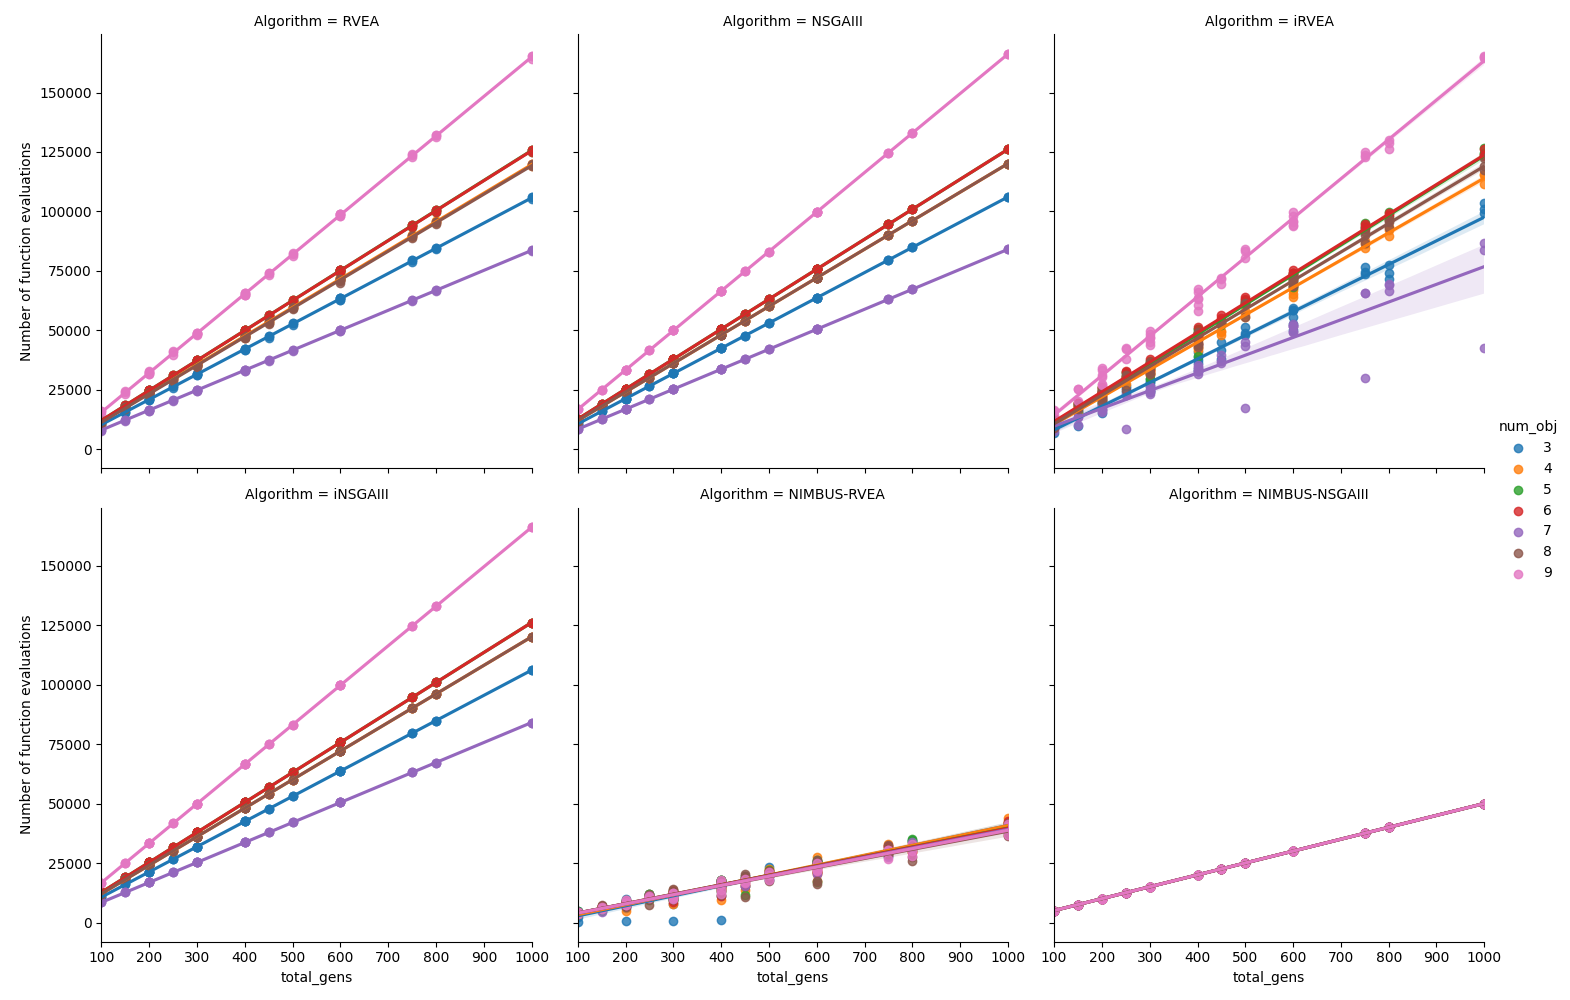

In [153]:
sns.lmplot(data=func_data_long,
           y="Number of function evaluations",
           x="total_gens",
           hue="num_obj",
           col="Algorithm",
           col_wrap=3,
          # lowess=True
          )
#plt.suptitle("Number of function evaluations)
#plt.tight_layout()

In [71]:
soln_cols = [name for name in all_cols if "num_solns" in name] + ["problem","num_obj","iteration","num_gens"]
soln_data = data[soln_cols]
soln_data

,RVEA_num_solns,NSGAIII_num_solns,iRVEA_num_solns,iNSGAIII_num_solns,NIMBUS-RVEA_num_solns,NIMBUS-NSGAIII_num_solns,problem,num_obj,iteration,num_gens
0,105,105,108,105,49,50,DTLZ2,3,1,100
1,105,105,108,105,14,50,DTLZ2,3,2,100
2,105,105,108,105,21,50,DTLZ2,3,3,100
3,105,105,108,105,50,50,DTLZ2,3,4,100
4,105,105,108,105,34,50,DTLZ3,3,1,100
...,...,...,...,...,...,...,...,...,...,...
331,165,165,174,165,43,50,DTLZ3,9,4,250
332,165,165,174,165,50,50,DTLZ4,9,1,250
333,165,165,174,165,8,50,DTLZ4,9,2,250
334,165,165,174,165,14,50,DTLZ4,9,3,250


In [72]:
soln_data_long = pd.melt(soln_data,
                        id_vars=["problem","num_obj","iteration","num_gens"],
                        value_vars=[name for name in all_cols if "num_solns" in name])

In [ ]:
sns.lmplot(data=soln_data_long, y="value",x="num_obj", hue="variable")

In [74]:
soln_data.describe()

,RVEA_num_solns,NSGAIII_num_solns,iRVEA_num_solns,iNSGAIII_num_solns,NIMBUS-RVEA_num_solns,NIMBUS-NSGAIII_num_solns,num_obj,iteration,num_gens
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.0,336.000000,336.000000,336.000000
mean,120.857143,120.857143,126.273810,120.857143,42.244048,50.0,6.000000,2.500000,175.000000
std,22.752211,22.752211,24.885458,22.752211,10.118992,0.0,2.002983,1.119701,55.985073
min,84.000000,84.000000,36.000000,84.000000,2.000000,50.0,3.000000,1.000000,100.000000
25%,105.000000,105.000000,108.000000,105.000000,38.000000,50.0,4.000000,1.750000,137.500000
50%,120.000000,120.000000,128.000000,120.000000,46.000000,50.0,6.000000,2.500000,175.000000
75%,126.000000,126.000000,132.000000,126.000000,50.000000,50.0,8.000000,3.250000,212.500000
max,165.000000,165.000000,174.000000,165.000000,50.000000,50.0,9.000000,4.000000,250.000000
